In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython import display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.animation import FuncAnimation

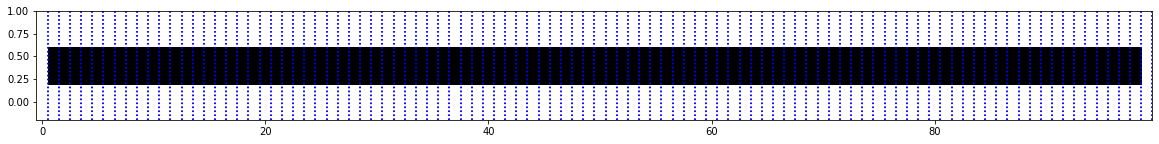

In [ ]:
# Parameter
M = 100
p = 0.3
v0 = 0
d = 2
N = 40
tmax = 1000
vmax = 5

mobil = mpimg.imread(r'C:\Users\Aldiyan Farhan N\Pictures\Car-PNG-Photos.png')
image_box = OffsetImage(mobil, zoom=0.1)
fig, ax = plt.subplots(1,1,figsize=(20,2))

def bundar():
  [ax.axvline(x=k+0.5, color='b', linestyle='dotted') for k in range(0,M+1)]
  ax.fill_between(np.linspace(0.5,M-1.5,10), 0.2, 0.6, color='black')
  ax.set_xlim(-0.5,M-0.5)
  ax.set_ylim(-0.2,1.)

jenis_lintasan = 'bunderan'
if jenis_lintasan == 'bunderan':
  bundar()
  line = [(0,0.4)]
  [line.append((k,0.8)) for k in range(M)]
  line.append((M-1,0.4))
  [line.append((k,0)) for k in range(M)[::-1]]
  bundar()

pos = np.sort(np.random.choice(range(len(line)), N, replace=False))
posawal = []
posawal.extend([100] * N)
vel = np.zeros(N)

In [ ]:
def update(k):
  for l in range(N):
    pos0 = pos[0]
    if (l == (N-1)):
      dist = (pos0-pos[l])%len(line)
    else:
      dist =  (pos[l+1]-pos[l])%len(line)

    if np.random.uniform() < p:  
      vel[l] = max(min(vel[l]+1,vmax,dist-1)-1,0)
    else:
      vel[l] = min(vel[l]+1,vmax,dist-1)
    dispS = (pos[l] + vel[l])%len(line)
    door = True
    if (posawal[l] >= 0 and door == True ):
      posawal[l] = posawal[i] - dispS
      vel[l]+=1
    else:
      door = False
    pos[l] = dispS

  return pos

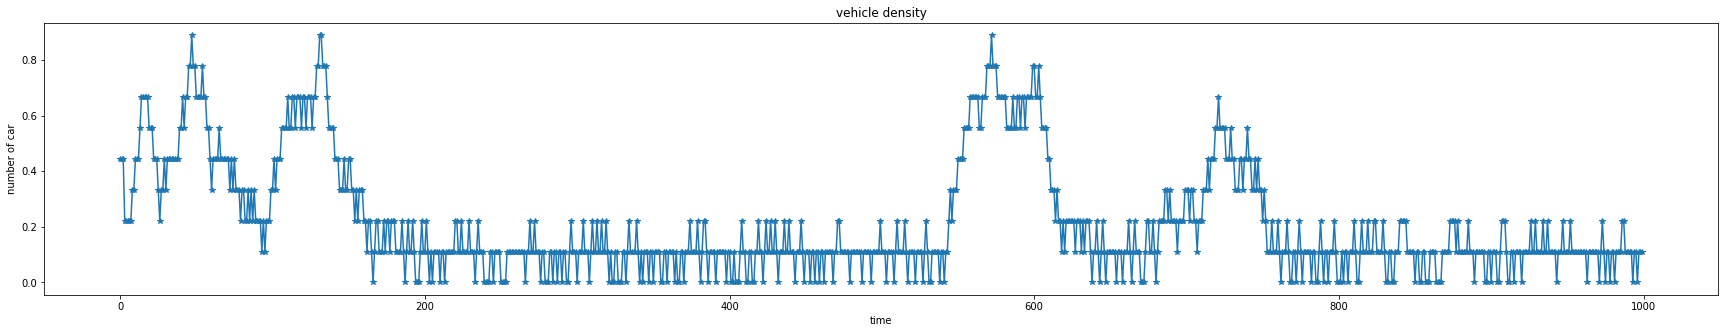

In [ ]:
density = []
for i in range(tmax):
  pos = update(i)
  density.append(np.count_nonzero((pos < 90) & (pos > 80))/(90-81))
plt.figure(figsize=(30,5))
plt.plot(range(tmax), density,'*-')
plt.title('vehicle density')
plt.xlabel('time')
plt.ylabel('number of car')
plt.show()

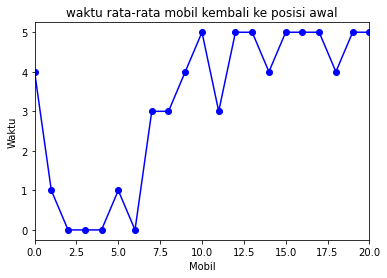


Jumlah mobil :  40
Total waktu yang dibutuhkan seluruh mobil kembali ke posisi awal :  84.0 seconds
Rata rata waktu mobil kembali ke posisi awal :  2.1 seconds


In [ ]:
plt.plot(vel, color='b', marker='o')
plt.title('waktu rata-rata mobil kembali ke posisi awal')
plt.xlabel('Mobil')
plt.ylabel('Waktu')
plt.xlim([0, 20])
plt.show()
print("")
print("Jumlah mobil : ", N)
print("Total waktu yang dibutuhkan seluruh mobil kembali ke posisi awal : ", sum(vel), "seconds")
print("Rata rata waktu mobil kembali ke posisi awal : ", sum(vel)/N, "seconds")

In [ ]:
def updateFrame(k):
  for l in range(N):
    pos0 = pos[0]
    if (l == (N-1)):
      dist = (pos0-pos[l])%len(line)
    else:
      dist =  (pos[l+1]-pos[l])%len(line)
    if np.random.uniform() < p:  
      vel[l] = max(min(vel[l]+1,vmax,dist-1)-1,0)
    else:
      vel[l] = min(vel[l]+1,vmax,dist-1)
    disp = (pos[l] + vel[l])%len(line)   
    pos[l] = disp

  return pos

In [ ]:
density = []
def AnimationFunction(frame):
  pos = updateFrame(frame)
  ax.clear()
  bundar() 
  for k in pos:
    ab = AnnotationBbox(image_box, line[k], frameon=False)
    ax.add_artist(ab)
  density.append(np.count_nonzero((pos > 90) & (pos > 80)) )

In [ ]:
RunAnimation = FuncAnimation(fig, AnimationFunction, frames=tmax, interval=100)
RunAnimation

In [ ]:
videofinal = RunAnimation.to_html5_video();
html = display.HTML(videofinal)
display.display(html)
plt.close()

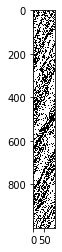

In [ ]:
from random import uniform, shuffle

num_iters = tmax
density = 0.2 # how many positives

# cars_num = int(density * M)
cars_num = N
initial = [0] * cars_num + [-1] * (M - cars_num)
shuffle(initial)

iterations = [initial]

for i in range(num_iters):
	prev,curr = iterations[-1],[-1] * M

	for x in range(M):
		if prev[x] > -1:
			vi = prev[x]
			d = 1
			while prev[(x + d) % M] < 0:
				d += 1

			vtemp = min(vi+1, d - 1, vmax) 
			v = max(vtemp - 1, 0) if uniform(0,1) < p else vtemp 
			curr[(x + v) % M] = v 
			#print(x,v)

	iterations.append(curr)

a = np.zeros(shape=(num_iters,M))
for i in range(M):
	for j in range(num_iters):
		a[j,i] = 1 if iterations[j][i] > -1 else 0
 
# showing image
plt.imshow(a, cmap="Greys", interpolation="nearest")
plt.show() 